In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [13]:
#All the features from the csv file
col_names = ['DewPointTemp', 'AvgDryBulbTemp', 'RelativeHumidity', 
             'SeaLevelAirPressure', 'LocalAirPressure', 
             'WetBulbTemp', 'AvgWindSpeed', 'CoolingDegreeDays', 
             'TempDeviation', 'HeatingDegreeDays', 'MaxDryBulbTemp',
             'MinDryBulbTemp', 'MaxWindSpeed', 'Precip', 'SnowDepth', 
             'Snowfall', 'SustainedWindSpeed', 'Sunrise', 'Sunset']

# load dataset
weather = pd.read_csv("data/weather_data.csv", header=None, names=col_names, skiprows=[0])

In [14]:
#Clean up precipitation records where there was trace amounts of precipitation or snow
weather.loc[(weather.Precip == 'T'), 'Precip'] = 0.001
weather.loc[(weather.SnowDepth == 'T'), 'SnowDepth'] = 0.001
weather.loc[(weather.Snowfall == 'T'), 'Snowfall'] = 0.001

In [15]:
#Create the label column
label = (pd.to_numeric(weather['Precip']) > 0).astype(int)
weather["Label"] = label

In [16]:
weather

,DewPointTemp,AvgDryBulbTemp,RelativeHumidity,SeaLevelAirPressure,LocalAirPressure,WetBulbTemp,AvgWindSpeed,CoolingDegreeDays,TempDeviation,HeatingDegreeDays,MaxDryBulbTemp,MinDryBulbTemp,MaxWindSpeed,Precip,SnowDepth,Snowfall,SustainedWindSpeed,Sunrise,Sunset,Label
0,25,61,29,30.22,27.26,44,5.5,0,-5.3,4,78,44,24,0.00,0.0,0.0,18,622,1859,0
1,24,68,21,30.25,27.29,47,7.1,3,2.1,0,86,50,18,0.00,0.0,0.0,15,623,1857,0
2,27,72,20,30.08,27.14,50,7.0,7,6.5,0,90,53,18,0.00,0.0,0.0,15,624,1855,0
3,29,75,18,29.99,27.08,52,6.1,10,9.8,0,91,58,21,0.00,0.0,0.0,15,625,1854,0
4,36,70,32,30.00,27.08,52,6.7,5,5.2,0,86,53,25,0.00,0.0,0.0,20,626,1852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,47,86,28,29.82,26.95,62,6.7,21,8.5,0,100,71,21,0.00,0.0,0.0,16,529,2013,0
3164,49,84,34,29.98,27.09,63,6.7,19,6.5,0,97,71,25,0.03,0.0,0.0,15,530,2012,1
3165,49,85,30,29.93,27.04,63,7.3,20,7.5,0,99,70,26,0.00,0.0,0.0,18,531,2011,0
3166,50,89,27,29.89,27.03,65,9.6,24,11.5,0,100,77,34,0.00,0.0,0.0,26,532,2010,0


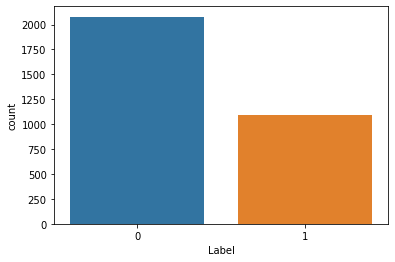

In [17]:
#0 means no rain, 1 means rain
ax = sns.countplot(x="Label", data=weather)

In [23]:
#Get the inputs and targets
#These are the features that seemed to have any sort of impact on training

feature_cols = ['AvgDryBulbTemp', 'RelativeHumidity', 
             'SeaLevelAirPressure', 'LocalAirPressure', 
             'WetBulbTemp', 'AvgWindSpeed', 'CoolingDegreeDays', 
             'HeatingDegreeDays', 'MaxDryBulbTemp',
             'MinDryBulbTemp', 
             'SustainedWindSpeed']
X = weather[feature_cols] 
y = weather.Label
X

,AvgDryBulbTemp,RelativeHumidity,SeaLevelAirPressure,LocalAirPressure,WetBulbTemp,AvgWindSpeed,CoolingDegreeDays,HeatingDegreeDays,MaxDryBulbTemp,MinDryBulbTemp,SustainedWindSpeed
0,61,29,30.22,27.26,44,5.5,0,4,78,44,18
1,68,21,30.25,27.29,47,7.1,3,0,86,50,15
2,72,20,30.08,27.14,50,7.0,7,0,90,53,15
3,75,18,29.99,27.08,52,6.1,10,0,91,58,15
4,70,32,30.00,27.08,52,6.7,5,0,86,53,20
...,...,...,...,...,...,...,...,...,...,...,...
3163,86,28,29.82,26.95,62,6.7,21,0,100,71,16
3164,84,34,29.98,27.09,63,6.7,19,0,97,71,15
3165,85,30,29.93,27.04,63,7.3,20,0,99,70,18
3166,89,27,29.89,27.03,65,9.6,24,0,100,77,26


In [19]:
#Split the data up into testing and training sets
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [20]:
#Get a new untrained model
model = LogisticRegression(max_iter=5000)

# Train :)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [21]:
#Get the model predictions for the test dataset
y_pred = model.predict(X_test)

#Check accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8497474747474747


Text(0.5, 0, 'Importance')

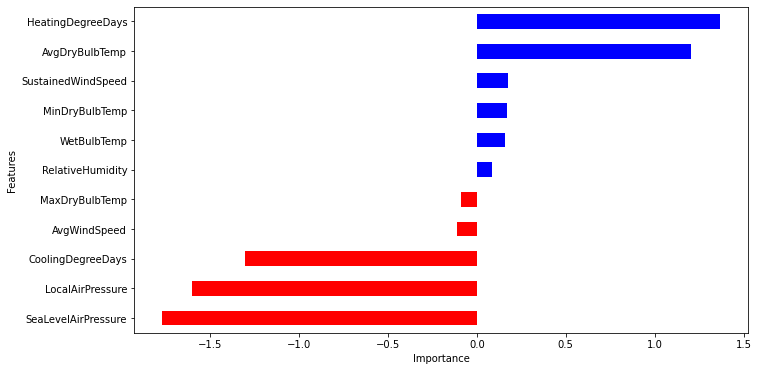

In [22]:
#Coefficient Magic
coeff = list(model.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [13]:
# Starting Accuracy: 0.8446969696969697
